# **Tarea 1 (Oscilaciones)**

## ***Análisis de la ecuación de Duffing***

**Santiago Londoño Álvarez, CC 1000084281**  
**Juan Pablo Sánchez Arroyave, CC 1000873471**



In [2]:
#@title Librerias

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## ***Introducción y Marco teórico***


Una de las ecuaciones más relevantes en la física es la del **oscilador armónico**, ya que permite modelar o aproximar muchos fenómenos naturales periódicos, como péndulos, circuitos eléctricos, interacciones moleculares, entre otros. No obstante, es importante distinguir entre los movimientos periódicos: los **armónicos** y los **anarmónicos**. El estudio de la estructura matemática de estos últimos es fundamental para comprender fenómenos complejos en los que la idealización del oscilador armónico no es aplicable.  

Entre las ecuaciones más estudiadas por los interesantes fenómenos que presenta se encuentra la **ecuación de Duffing**, propuesta por el ingeniero **Georg Duffing**. Esta describe un oscilador armónico forzado y amortiguado, modificado con una no linealidad de potencia cúbica. Es particularmente útil para modelar sistemas mecánicos que se alejan de la aproximación de pequeñas oscilaciones, como un resorte muy estirado. Además, bajo ciertos parámetros, esta ecuación exhibe un **comportamiento caótico**, lo que la hace valiosa para modelar sistemas cíclicos pero altamente sensibles, como el clima o el mercado financiero.  

La ecuación de Duffing se expresa como:  

$$
\ddot{x} + \alpha x + \delta \dot{x} + \beta x^3 = \gamma \cos(\omega t)
\tag{1}
$$  

donde:  

- **δ**: coeficiente de **amortiguamiento**  
- **α**: parámetro de **rigidez**  
- **β**: coeficiente de **no linealidad**  
- **γ**: amplitud de la **fuerza externa**  
- **ω**: frecuencia de la **fuerza externa**  

El objetivo de este trabajo es analizar cómo cambia el sistema al variar la frecuencia de la fuerza externa ($\omega$), mediante el estudio de la **trayectoria temporal**, su **comportamiento en el espacio de fases** y, finalmente, el **análisis de histéresis** en la gráfica de amplitud contra frecuencia en el caso resonante.


## ***Solucion Numerica***



En este trabajo se resolverá la ecuación mediante el método de Runge-Kutta 4, implementado en la librería `scipy` de Python.

In [ ]:
#@title Discretización de la ecuación (utilizando ω como parámetro)

def duffing(t, VI, omega):
    x, v = VI
    dxdt = v
    dvdt = gamma * np.cos(omega * t) - delta * v - alpha * x - beta * x**3
    return [dxdt, dvdt]

Justo como se vio en el curso de métodos computacionales, para solucionar la ecuación diferencial, se define una función que retorna la primera y segunda derivada de la función dependiendo de los valores iniciales de la coordenada y la velocidad.

Luego utilizamos la función:

    sol = solve_ivp(duffing, [t_0, t_f], VI, args=(omega,), t_eval=t_eval, method='RK45', rtol=1e-6)

que resuelve numéricamente la función según un tiempo inicial y final ($t_0$ y $t_f$), con unas condiciones iniciales VI. En `args` se colocan los parámetros que queremos variar, en este caso las frecuencias (`omega`). Luego, se especifica un tiempo de evaluación `t_eval` (un intervalo que define la resolución del paso temporal), el método, que como se mencionó anteriormente es Runge-Kutta 4, y la tolerancia `rtol`, que en este trabajo será de $10^{-6}$.

Para obtener la solución usamos:

    sol.t, sol.y[0], sol.y[1]

los cuales seleccionan los valores de tiempo, posición y velocidad, respectivamente.

## ***Análisis de la trayectoria***

Se fijaron los siguientes valores:

- $α = -1$
- $γ = 1$
- $δ = 0.47$
- $β = 1$

Con ellos se obtiene una transición interesante entre oscilaciones al variar los valores de $ω = ω_0/2, ω_0, 3ω_0/2, 2ω_0, 5ω_0/2, 3ω_0$, donde $ω_0 = 1$ es la frecuencia propia del oscilador.

Es importante mencionar que, para las gráficas posteriores, se compararon las trayectorias en el **estado estable**, ya que, como sabemos, los osciladores armónicos forzados y amortiguados tienen un término evanescente que desaparece tras un tiempo prolongado. De manera similar, al ser la ecuación de Duffing una ecuación de oscilador armónico forzado y amortiguado con la adición de una no linealidad, esta presenta el mismo comportamiento y alcanza la estabilidad después de un tiempo. Esos primeros términos se denominan evanescentes y son los que se ignorarán para el siguiente análisis.

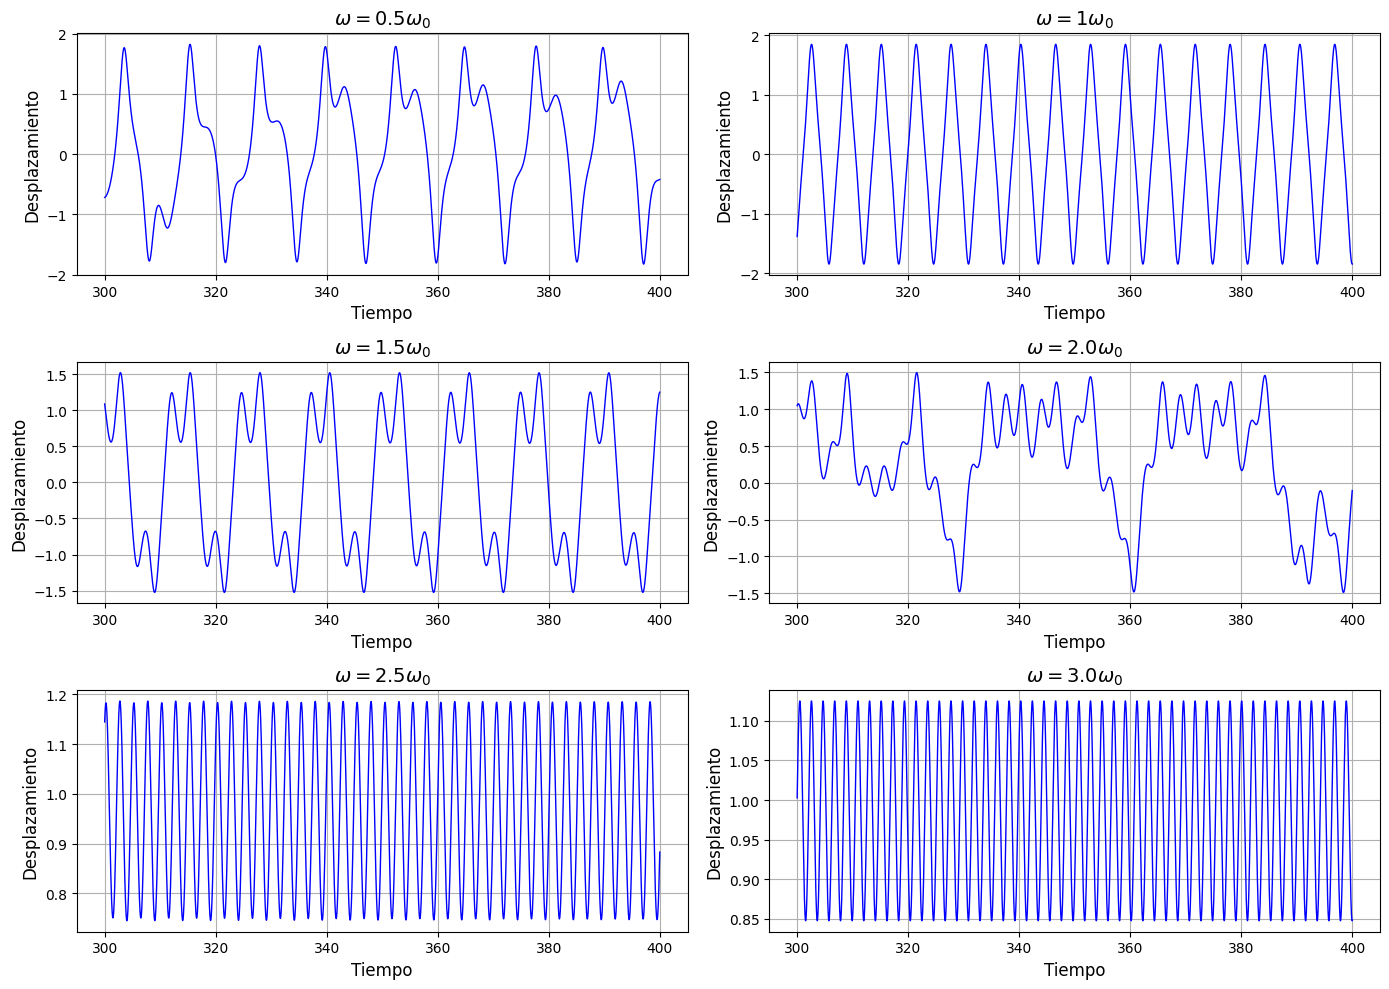

In [ ]:
#@title Gráficas de Trayectoria

# Parametros
alpha, beta, delta, gamma = -1.0, 1.0, 0.47, 1.0
omegas = [0.5, 1, 1.5, 2.0, 2.5, 3.0]

# Parametros de tiempo
t_0, t_f = 0, 400
dt = 0.01
t_eval = np.arange(t_0, t_f, dt)

#Descarte de los terminos evanescentes
#Se toman como terminos evanecentes los correspodientes
#a los primeros 300 segundos de a simulacion
steady_idx = int(300 / dt)

#Valores Iniciales
VI = [0.0, 0.0]

# COdigo para generar la imagen
plt.figure(figsize=(14, 10))

for i, omega in enumerate(omegas):

    #Solucion numerica
    sol = solve_ivp(duffing, [t_0, t_f], VI, args=(omega,), t_eval=t_eval, method='RK45', rtol=1e-6)


    #Selecionamos los tiempos y las posiciones estables
    t_steady = sol.t[steady_idx:]
    x_steady = sol.y[0, steady_idx:]

    #Codigo para graficar los terminos estables
    plt.subplot(3, 2, i+1)
    plt.plot(t_steady, x_steady, 'b-', lw=1)
    plt.title(f'$\omega = {omega}\omega_0$', fontsize=14)
    plt.xlabel('Tiempo', fontsize=12)
    plt.ylabel('Desplazamiento', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

Vemos entonces tres tipos de movimiento:

1. **Oscilaciones con forma sinusoidal.**  
2. **Oscilaciones periódicas sin forma sinusoidal:** se repite el mismo movimiento, pero con subpicos y subvalles entre los picos y valles principales.  
3. **Oscilaciones sin periodicidad.**  

Observamos que, para las frecuencias 1.0 y 3.0, las oscilaciones corresponden al primer tipo. Podría decirse casi lo mismo para la frecuencia 2.5, aunque en este caso se presentan pequeñas variaciones en los picos: el sistema no siempre retorna exactamente al valor máximo anterior, sino a uno muy cercano.  

La frecuencia 1.5 corresponde al segundo tipo, pues el movimiento es periódico; sin embargo, presenta subpicos y subvalles dentro de cada periodo, lo que impide que el movimiento sea estrictamente sinusoidal.  

En cuanto a las frecuencias 0.5 y 2.0, el movimiento carece de periodicidad: se observan oscilaciones entre una amplitud máxima y mínima, pero estas no presentan un periodo definido.  

Un aspecto interesante de las gráficas es que, para las frecuencias 2.5 y 3.0, las oscilaciones ya no están centradas en 0, sino que el punto de equilibrio presenta un desplazamiento aproximado de 1.  

Finalmente, notamos que la mayor amplitud se obtiene para la frecuencia 1.0, lo cual concuerda con la teoría, ya que este corresponde al término resonante.


## **Análisis del espacio de fase**

Para complementar el análisis anterior, realizaremos el estudio del diagrama de fase, en el cual, en lugar de graficar el momento en el eje vertical, representaremos las velocidades por comodidad, ya que el análisis cualitativo que se puede obtener de él es esencialmente el mismo.  

Los parámetros fijados son los mismos que en el caso anterior.


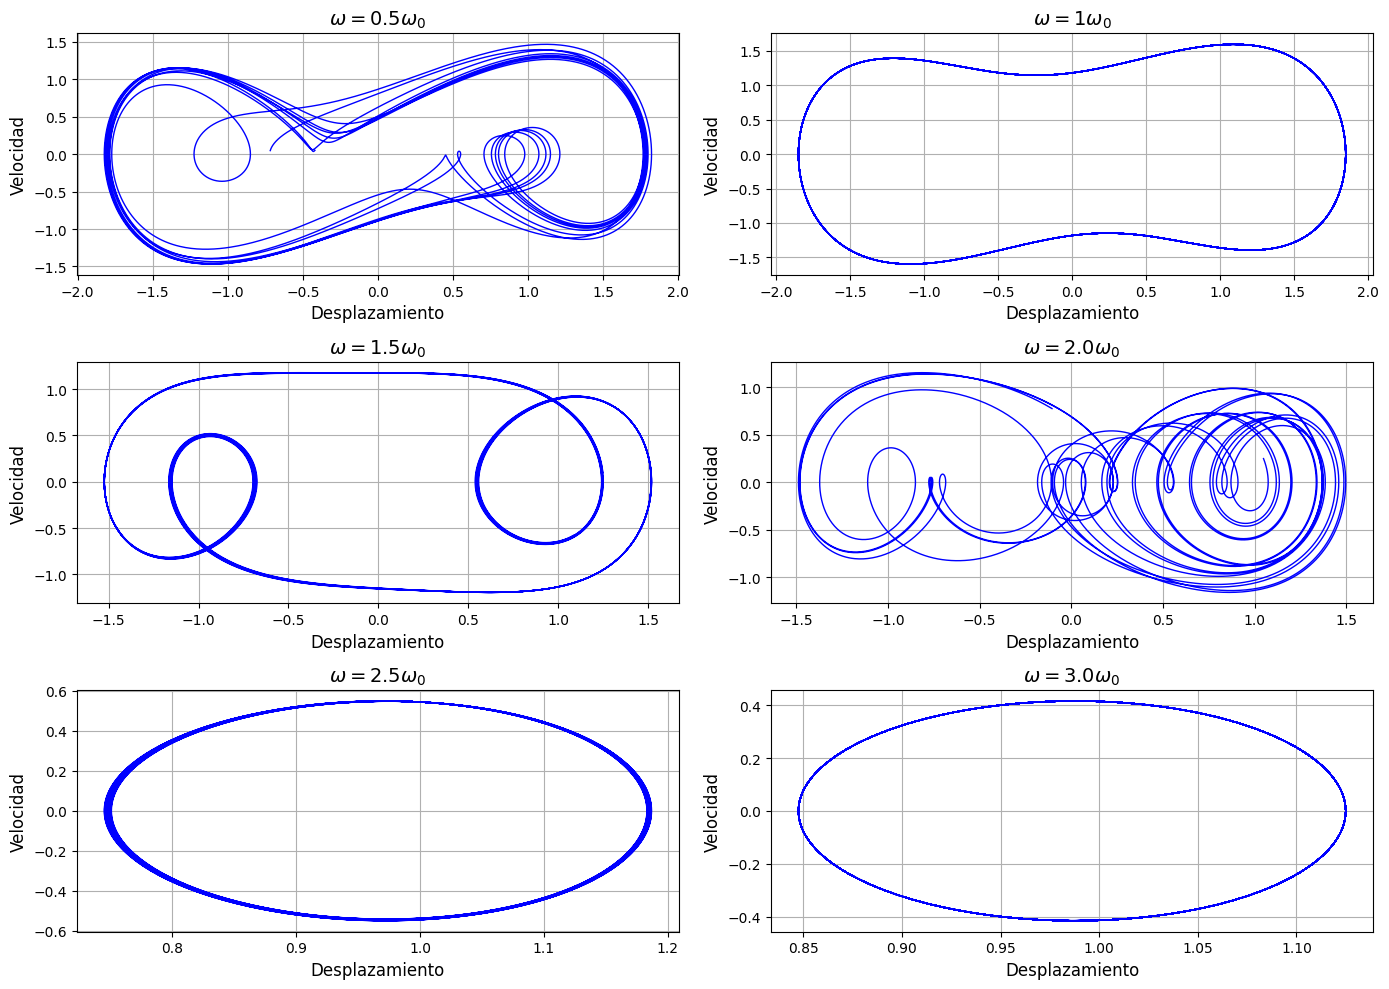

In [ ]:
#@title Graficas del espacio de fase

# Parametros
alpha, beta, delta, gamma = -1.0, 1.0, 0.47, 1.0
omegas = [0.5, 1, 1.5, 2.0, 2.5, 3.0]

# Parametros de tiempo
t_0, t_f = 0, 400
dt = 0.01
t_eval = np.arange(t_0, t_f, dt)

#Descarte de los terminos evanescentes
#Se toman como terminos evanecentes los correspodientes
#a los primeros 300 segundos de a simulacion
steady_idx = int(300 / dt)

#Valores Iniciales
VI = [0.0, 0.0]

# COdigo para generar la imagen
plt.figure(figsize=(14, 10))

for i, omega in enumerate(omegas):

    #Solucion numerica
    sol = solve_ivp(duffing, [t_0, t_f], VI, args=(omega,), t_eval=t_eval, method='RK45', rtol=1e-6)

    #Selecionamos los tiempos y las posiciones estables
    x_steady = sol.y[0, steady_idx:]
    v_steady = sol.y[1, steady_idx:]

    #Codigo para graficar los terminos estables
    plt.subplot(3, 2, i+1)
    plt.plot(x_steady, v_steady, 'b-', lw=1)
    plt.title(f'$\omega = {omega}\omega_0$', fontsize=14)
    plt.xlabel('Desplazamiento', fontsize=12)
    plt.ylabel('Velocidad', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

Con esta nueva información podemos contrastar el análisis previamente realizado.  

Para el **caso uno**, con las formas sinusoidales, cada frecuencia presenta características interesantes. Observamos que, para el caso de 1.0, el espacio de fases no tiene una forma perfectamente circular; esto se debe a las no linealidades en el régimen resonante. En contraste, para 2.5 y 3.0 aparecen trayectorias circulares, lo cual indica que la fuerza externa domina sobre las no linealidades, dando lugar a un movimiento sinusoidal. Sin embargo, en el caso de 2.5, a diferencia de los otros dos, los bordes son más gruesos, lo que muestra que entre cada pico los valores no son exactamente iguales. Aunque describe un movimiento periódico, este no es completamente regular debido a dichas irregularidades.  

En el **caso dos**, correspondiente a 1.5, se observa una trayectoria cerrada, engrosada y con dos pequeños subcírculos en el recorrido. La primera característica señala que el movimiento es periódico; no obstante, la segunda evidencia que dicha periodicidad no es completamente regular, similar a lo observado en 2.5. La diferencia radica en que, en las gráficas de desplazamiento, el comportamiento de 2.5 era visible a simple vista, mientras que en 1.5 solo se detecta mediante el análisis en el espacio de fases. Finalmente, la tercera característica corresponde a los subvalles y subpicos mencionados previamente: estos son subarmónicos que se acoplan con el armónico principal (el de la periodicidad).  

En el **caso tres**, para las frecuencias 0.5 y 1.5, las trayectorias no son cerradas. Esto evidencia que el movimiento es caótico, ya que no existe un periodo definido. Sin embargo, se distinguen diferencias entre ambas: aunque en los dos casos la trayectoria no se cierra, en 0.5 el comportamiento es menos caótico que en 1.5, donde se observan variaciones mucho más bruscas en la trayectoria.  

Por último, cabe destacar que, al igual que en el caso anterior, las gráficas para 2.5 y 3.0 están centradas en 1 en el eje horizontal, a diferencia de los otros cuatro gráficos, lo cual indica que el punto de equilibrio se ha desplazado.


## ***Análisis de histéresis***


Finalmente, existe un efecto muy importante que debe discutirse al tratar con sistemas anarmónicos: la curva de **histéresis** que aparece en la relación **amplitud vs. frecuencia** cerca del punto de resonancia. Esta curva muestra una diferencia notable dependiendo de si el barrido se realiza desde valores menores que $ω_0$ o si se aproxima desde valores mayores.  

Para este caso se fijaron los siguientes parámetros:

- $α = 1$  
- $δ = 0.1$  
- $β = 0.04$  

En este escenario, $γ$ no tiene un valor fijo, ya que, como se vio en clase, existe un valor crítico de la amplitud de la fuerza externa a partir del cual el sistema comienza a experimentar histéresis. Por lo tanto, se realizará un barrido de $γ$, y para cada valor se obtendrá la gráfica de amplitud vs. frecuencia.  

En este caso, la frecuencia propia vuelve a ser $ω_0 = 1$.


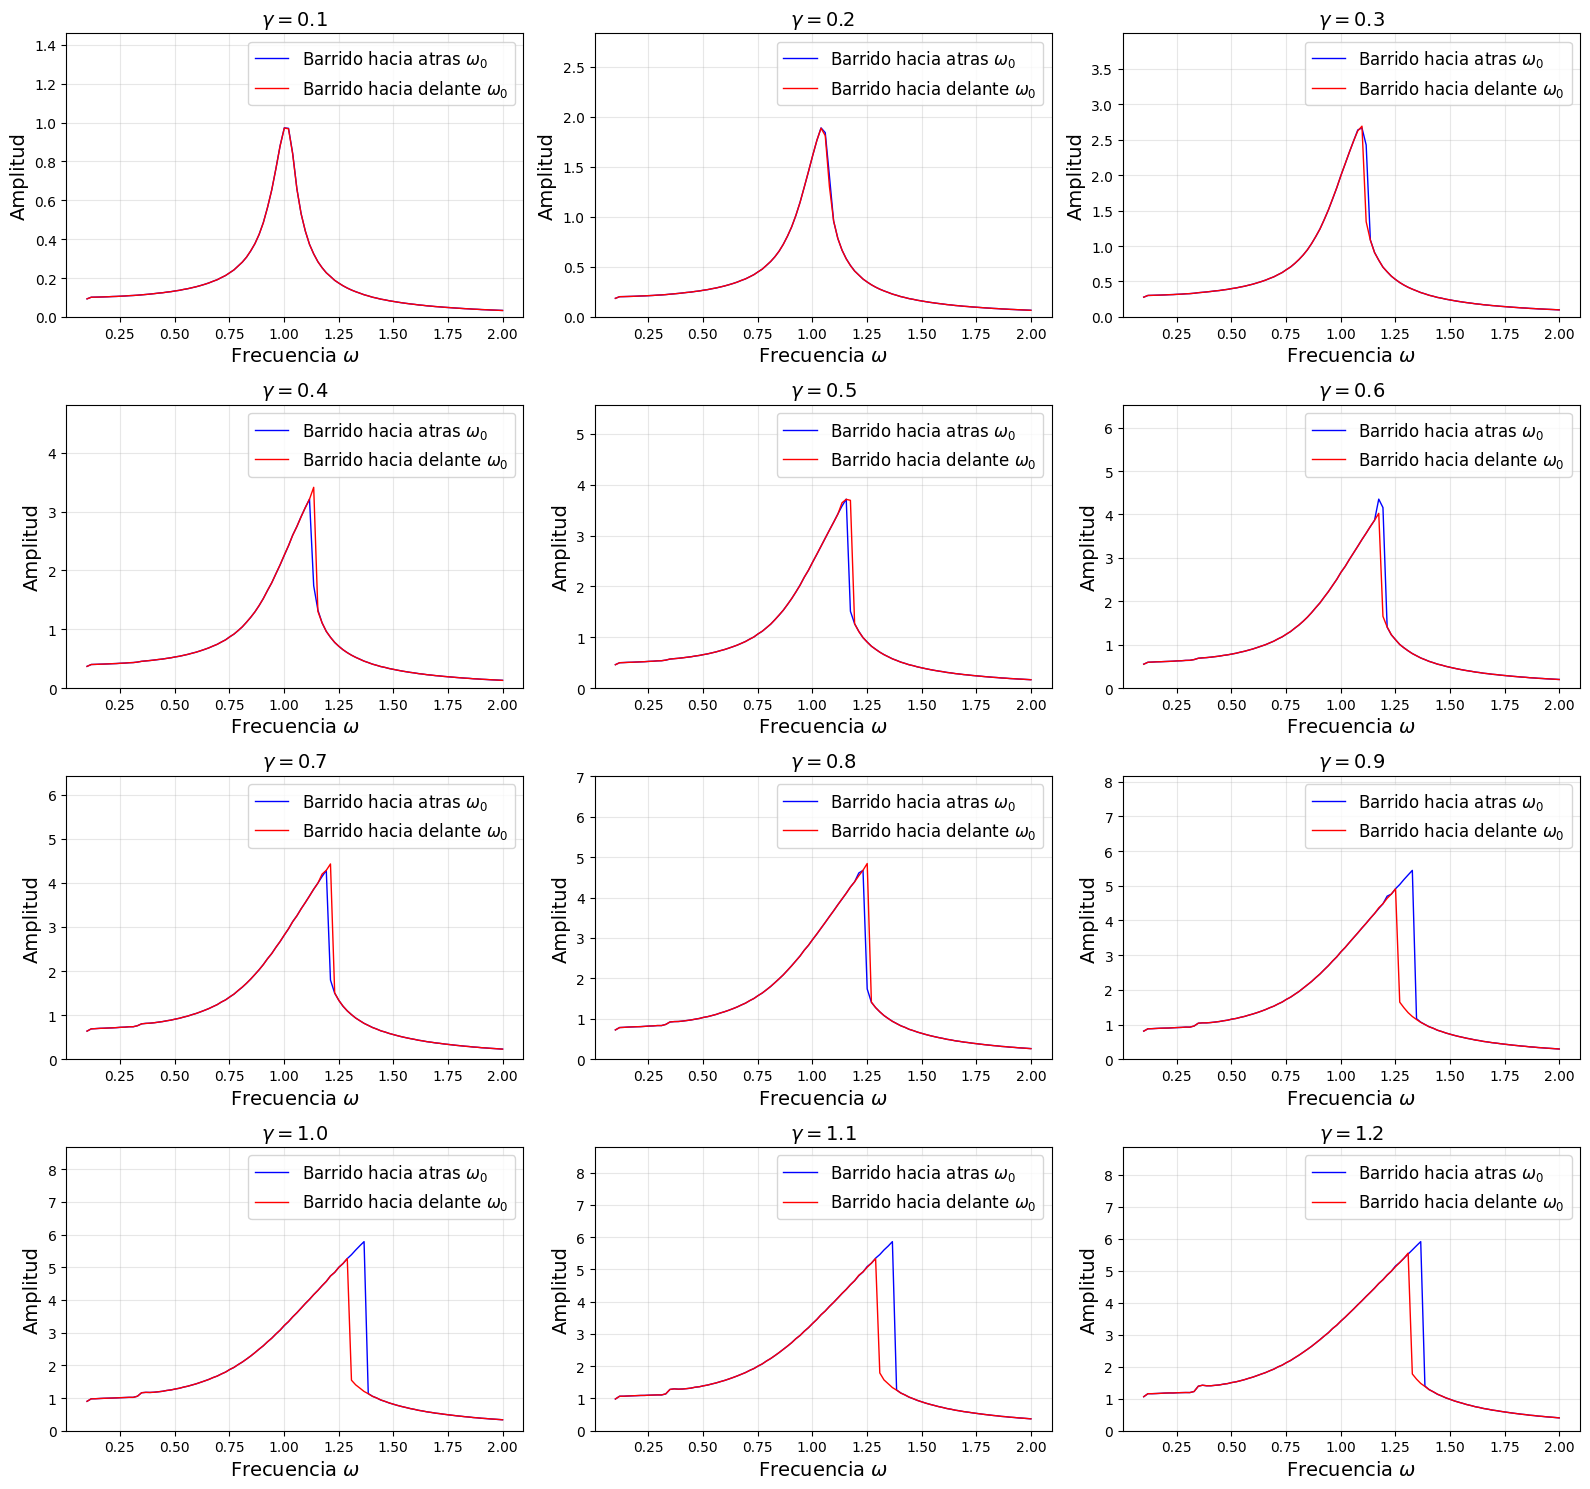

In [ ]:
#@title Análisis de histéresis

# Parametros Fijos
alpha, beta, delta = 1, 0.04, 0.1

#Creamos un rango continuo de omegas

omega_min, omega_max = 0.1, 2.0   # Limites del rango
omega_puntos = 100                # Numero de puntos
omega_points = np.linspace(omega_min, omega_max, omega_puntos)

#Parametros de tiempo
t_0, t_f = 0, 150
dt = 0.01
t_eval = np.arange(t_0, t_f, dt)

#Descatamos los terminos evancentes
steady_idx = int(100 / dt)

#Creacion de la figura
plt.figure(figsize=(16,15))

#Barrido de frecuencias
j = 0
for gamma in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]:

  forward_amp = np.zeros(omega_puntos)
  backward_amp = np.zeros(omega_puntos)

  #Estado inicial
  VI = [0.0, 0.0]

  for i, omega in enumerate(omega_points):


      #Se resuelve para cada valor de omega variando las condiciones iniciales
      sol = solve_ivp(duffing, [t_0,t_f], VI, args=(omega,), t_eval=t_eval, rtol=1e-6)
      x = sol.y[0]

      #Se decartan los valores evanecentes
      steady_x = x[steady_idx:]

      amp = (np.max(steady_x) - np.min(steady_x)) / 2
      forward_amp[i] = amp

      #Actualizar condiciones iniciales
      VI = [x[-1], sol.y[1][-1]]

  #Estado inicial
  VI = [0.0, 0.0]

  # Backward sweep (high to low frequency)
  for i, omega in enumerate(omega_points[::-1]):


      #Se resuelve para cada valor de omega variando las condiciones iniciales
      sol = solve_ivp(duffing, [t_0,t_f], VI, args=(omega,), t_eval=t_eval, rtol=1e-6)
      x = sol.y[0]

      #Se decartan los valores evanecentes
      steady_x = x[steady_idx:]

      amp = (np.max(steady_x) - np.min(steady_x)) / 2
      backward_amp[i] = amp

      #Actualizar condiciones iniciales
      VI = [x[-1], sol.y[1][-1]]

  # Generamos la garfica
  plt.subplot(4, 3, j+1)
  plt.plot(omega_points, forward_amp, 'b-', lw=1, label='Barrido hacia atras $\omega_0$')
  plt.plot(omega_points[::-1], backward_amp, 'r-', lw=1, label='Barrido hacia delante $\omega_0$')
  plt.xlabel('Frecuencia $\omega$', fontsize=14)
  plt.ylabel('Amplitud', fontsize=14)
  plt.title('$\\gamma=$'+str(gamma), fontsize=14)
  plt.legend(fontsize=12)
  plt.grid(True, alpha=0.3)
  #plt.xlim(omega_min, omega_max)
  plt.ylim(0, np.max(forward_amp) + np.max(forward_amp)/2)
  j = j + 1

plt.tight_layout()
plt.savefig('duffing_hysteresis.png', dpi=150)
plt.show()

Podemos identificar tres comportamientos principales:

1. **Curva simétrica**: centrada en la frecuencia propia, donde los barridos hacia adelante y hacia atrás son iguales.  
2. **Curva asimétrica**: el máximo se desplaza hacia la derecha de la frecuencia propia, mostrando una ligera diferencia entre los barridos hacia adelante y hacia atrás.  
3. **Curva de histéresis**: el pico se desplaza hacia la derecha de la frecuencia propia y los barridos hacia adelante y hacia atrás difieren considerablemente.  

El primer comportamiento se observa únicamente para $γ = 0.1$.  
En el rango de $γ = 0.2$ a $γ = 0.8$ aparece el comportamiento 2, mientras que a partir de $γ = 0.9$ se observa claramente un comportamiento de histéresis.  

Estas gráficas concuerdan con lo estudiado en el libro guía. Cabe aclarar que no se analizaron las frecuencias mayores a 2.0, ya que no aportan información relevante en este caso.


## ***Conclusión***

El estudio de las oscilaciones permitió comprender las diferencias entre movimientos armónicos y no lineales, mostrando cómo el oscilador de Duffing enriquece la descripción de fenómenos más complejos. A través de la simulación se evidenció que, según los parámetros, el sistema puede presentar comportamientos periódicos, caóticos o intermedios, lo que resalta la importancia de la no linealidad en la física real.